In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Baca file CSV
df = pd.read_csv('/content/Sales Transaction v.4a.csv')

In [26]:
# Hilangkan nilai di atas 8000 dan di bawah -8000 pada kolom Quantity
df_filtered = df[(df['Quantity'] <= 8000) & (df['Quantity'] >= -8000)]

In [27]:
# Imputasi nilai yang hilang dengan rata-rata
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df[['Price', 'Quantity']]), columns=['Price', 'Quantity'])


In [28]:
# Mengganti label 'good' dengan 1 dan 'bad' dengan 0 dalam kolom 'Category'
df['Country'].replace({'United Kingdom': 1, 'Norway': 0}, inplace=True)

In [29]:
#menampilkan data setelah normalisasi
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12.0,17490.0,1
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36.0,13069.0,1
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12.0,13069.0,1
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12.0,13069.0,1
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6.0,13069.0,1


In [30]:
# Transformasi menggunakan PowerTransformer dengan method 'yeo-johnson'
scaler = PowerTransformer(method='yeo-johnson')
df_transformed = pd.DataFrame(scaler.fit_transform(df_normalized), columns=['Price', 'Quantity'])

In [32]:
# Lakukan klasterisasi untuk mencari jumlah klaster yang optimal
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(df_transformed)
    clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

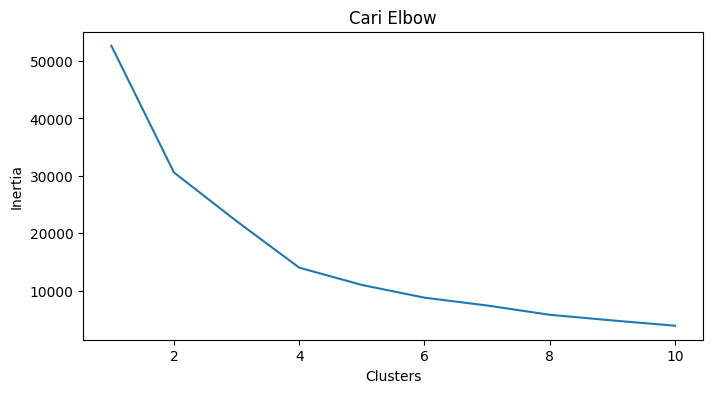

In [33]:
# Buat plot inertia
plt.figure(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters)
plt.title('Cari Elbow')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-34-c1321f614cf0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Labels'] = km5.labels_


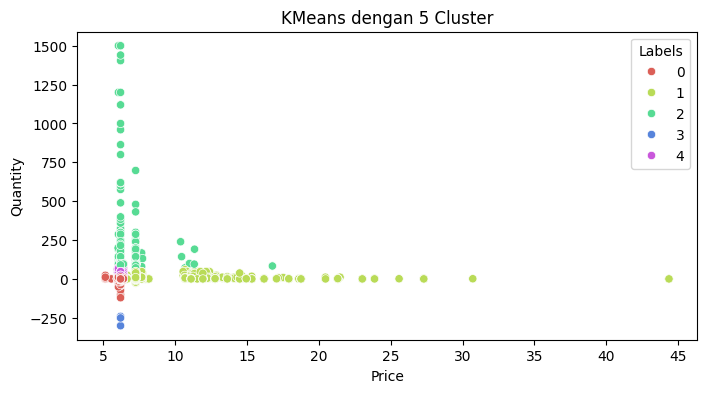

In [34]:
# Buat objek KMeans
km5 = KMeans(n_clusters=5).fit(df_transformed)

# Tambahkan kolom label pada dataset
df_filtered['Labels'] = km5.labels_

# Visualisasikan hasil klasterisasi
plt.figure(figsize=(8,4))
sns.scatterplot(x='Price', y='Quantity', hue='Labels', data=df_filtered,
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()